### Task 1

1.	XY_train.csv in folder ‘’Task 1’’ contains a dataset of Views against 6 input variables.

a.	Select and train a model to predict the views for a given video, given the features provided.
b.	Explain your choice of model and why it is suitable for this problem
c.	Comment on your model’s performance as well as the significance of each feature.
d.	Provide predictions for views of videos within X_test.csv, as well as an estimation of your out-of-sample performance.


In [1]:
import pandas as pd
import numpy as np
import datetime
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classification algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Cross validation
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score,r2_score 

# Visualisations 
import matplotlib.pyplot as plt
import seaborn as sns

##### First step

Load the data from the files, check for missing values, duplicates and then clean the data

In [2]:
df = pd.read_csv("../ML Task/Task 1/XY_train.csv")
df.head()

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Views,Subscribers,Impressions click-through rate (%)
0,2035.0,1578.0,97.95,0:09:32,4319500.0,3574.0,4.66
1,1070.0,1878.0,97.92,0:10:38,2522030.0,4845.0,5.14
2,1375.0,4314.0,97.54,0:09:31,3564849.0,8505.0,7.00
3,420.0,502.0,98.34,0:06:06,1148850.0,513.0,7.27
4,982.0,977.0,97.43,0:07:32,1559413.0,3865.0,5.08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Shares                              429 non-null    float64
 1   Comments added                      429 non-null    float64
 2   Likes (vs. dislikes) (%)            429 non-null    float64
 3   Average view duration               429 non-null    object 
 4   Views                               429 non-null    float64
 5   Subscribers                         429 non-null    float64
 6   Impressions click-through rate (%)  429 non-null    float64
dtypes: float64(6), object(1)
memory usage: 27.2+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Shares,429.0,2.972510e+03,7.274326e+03,203.00,900.00,1570.00,2763.00,106414.00
Comments added,429.0,1.814564e+03,1.622438e+03,187.00,755.00,1221.00,2336.00,9109.00
Likes (vs. dislikes) (%),429.0,9.770117e+01,9.077020e-01,91.33,97.34,97.88,98.28,99.12
Views,429.0,3.463973e+06,3.222874e+06,1033484.00,1563399.00,2357541.00,3982387.00,28037362.00
Subscribers,429.0,8.346900e+03,1.281010e+04,341.00,2117.00,4216.00,8505.00,120906.00
Impressions click-through rate (%),429.0,5.590396e+00,1.112541e+00,2.62,4.87,5.46,6.23,10.42


In [5]:
df[df.duplicated()]

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Views,Subscribers,Impressions click-through rate (%)
430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.drop_duplicates()

In [7]:
df[df.duplicated()]

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Views,Subscribers,Impressions click-through rate (%)


In [8]:
df.isna().sum()

Shares                                1
Comments added                        1
Likes (vs. dislikes) (%)              1
Average view duration                 1
Views                                 1
Subscribers                           1
Impressions click-through rate (%)    1
dtype: int64

In [9]:
df.isna()

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Views,Subscribers,Impressions click-through rate (%)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
425,False,False,False,False,False,False,False
426,False,False,False,False,False,False,False
427,False,False,False,False,False,False,False
428,False,False,False,False,False,False,False


In [10]:
df = df.dropna()

In [11]:
df.isna().sum()

Shares                                0
Comments added                        0
Likes (vs. dislikes) (%)              0
Average view duration                 0
Views                                 0
Subscribers                           0
Impressions click-through rate (%)    0
dtype: int64

Change the data of the average view duration to seconds so it is easier to work with.

In [12]:
df['Average view duration'] =df['Average view duration'].apply(lambda x: float(x.split(':')[0])*60+float(x.split(':')[1]))

##### Next:

Load the test data, clean if required and modify the average view duration column as done in the training data

In [25]:
test_df = pd.read_csv("../ML Task/Task 1/X_test.csv")
test_df.head()

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Subscribers,Impressions click-through rate (%),Views prediction
0,27558,3243,95.66,00:11:10,28895,4.84,NaN
1,575,942,98.10,00:10:59,879,5.99,NaN
2,5362,1903,95.28,00:06:27,10362,5.98,NaN
3,1231,465,93.65,00:10:26,3119,5.35,NaN
4,4115,2126,97.16,00:13:42,10311,3.55,NaN


In [27]:
test_df['Average view duration'] =test_df['Average view duration'].apply(lambda x: float(x.split(':')[0])*60+float(x.split(':')[1]))

In [29]:
test_df.isna().sum()

Shares                                 0
Comments added                         0
Likes (vs. dislikes) (%)               0
Average view duration                  0
Subscribers                            0
Impressions click-through rate (%)     0
Views prediction                      71
dtype: int64

In [31]:
test_df[test_df.duplicated()]

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Subscribers,Impressions click-through rate (%),Views prediction


##### Then:

Break down the data into training and test data

In [33]:
# get the X,y
X = df.drop('Views', axis=1)
y = df['Views']

# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=0)
print(X_train.shape, y_train.shape)
X_train.sample(3)


(386, 6) (386,)


,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Subscribers,Impressions click-through rate (%)
255,1044.0,564.0,98.18,10.0,1015.0,4.91
134,768.0,1207.0,97.87,6.0,4060.0,6.85
282,1007.0,2964.0,97.94,12.0,5341.0,5.64


In [35]:
X_test

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Subscribers,Impressions click-through rate (%)
153,1788.0,2094.0,98.68,10.0,6269.0,5.21
160,833.0,518.0,97.93,10.0,2764.0,5.62
54,917.0,1547.0,97.97,9.0,5702.0,6.10
393,7397.0,1759.0,98.02,9.0,5676.0,5.33
10,2660.0,526.0,97.15,7.0,5195.0,4.00
364,1882.0,923.0,98.55,5.0,3787.0,6.93
347,3876.0,1221.0,97.55,9.0,5892.0,5.47
102,1180.0,2572.0,96.75,9.0,4742.0,6.96
107,1975.0,814.0,97.81,7.0,3467.0,5.94
219,4621.0,2949.0,98.14,9.0,11842.0,7.09


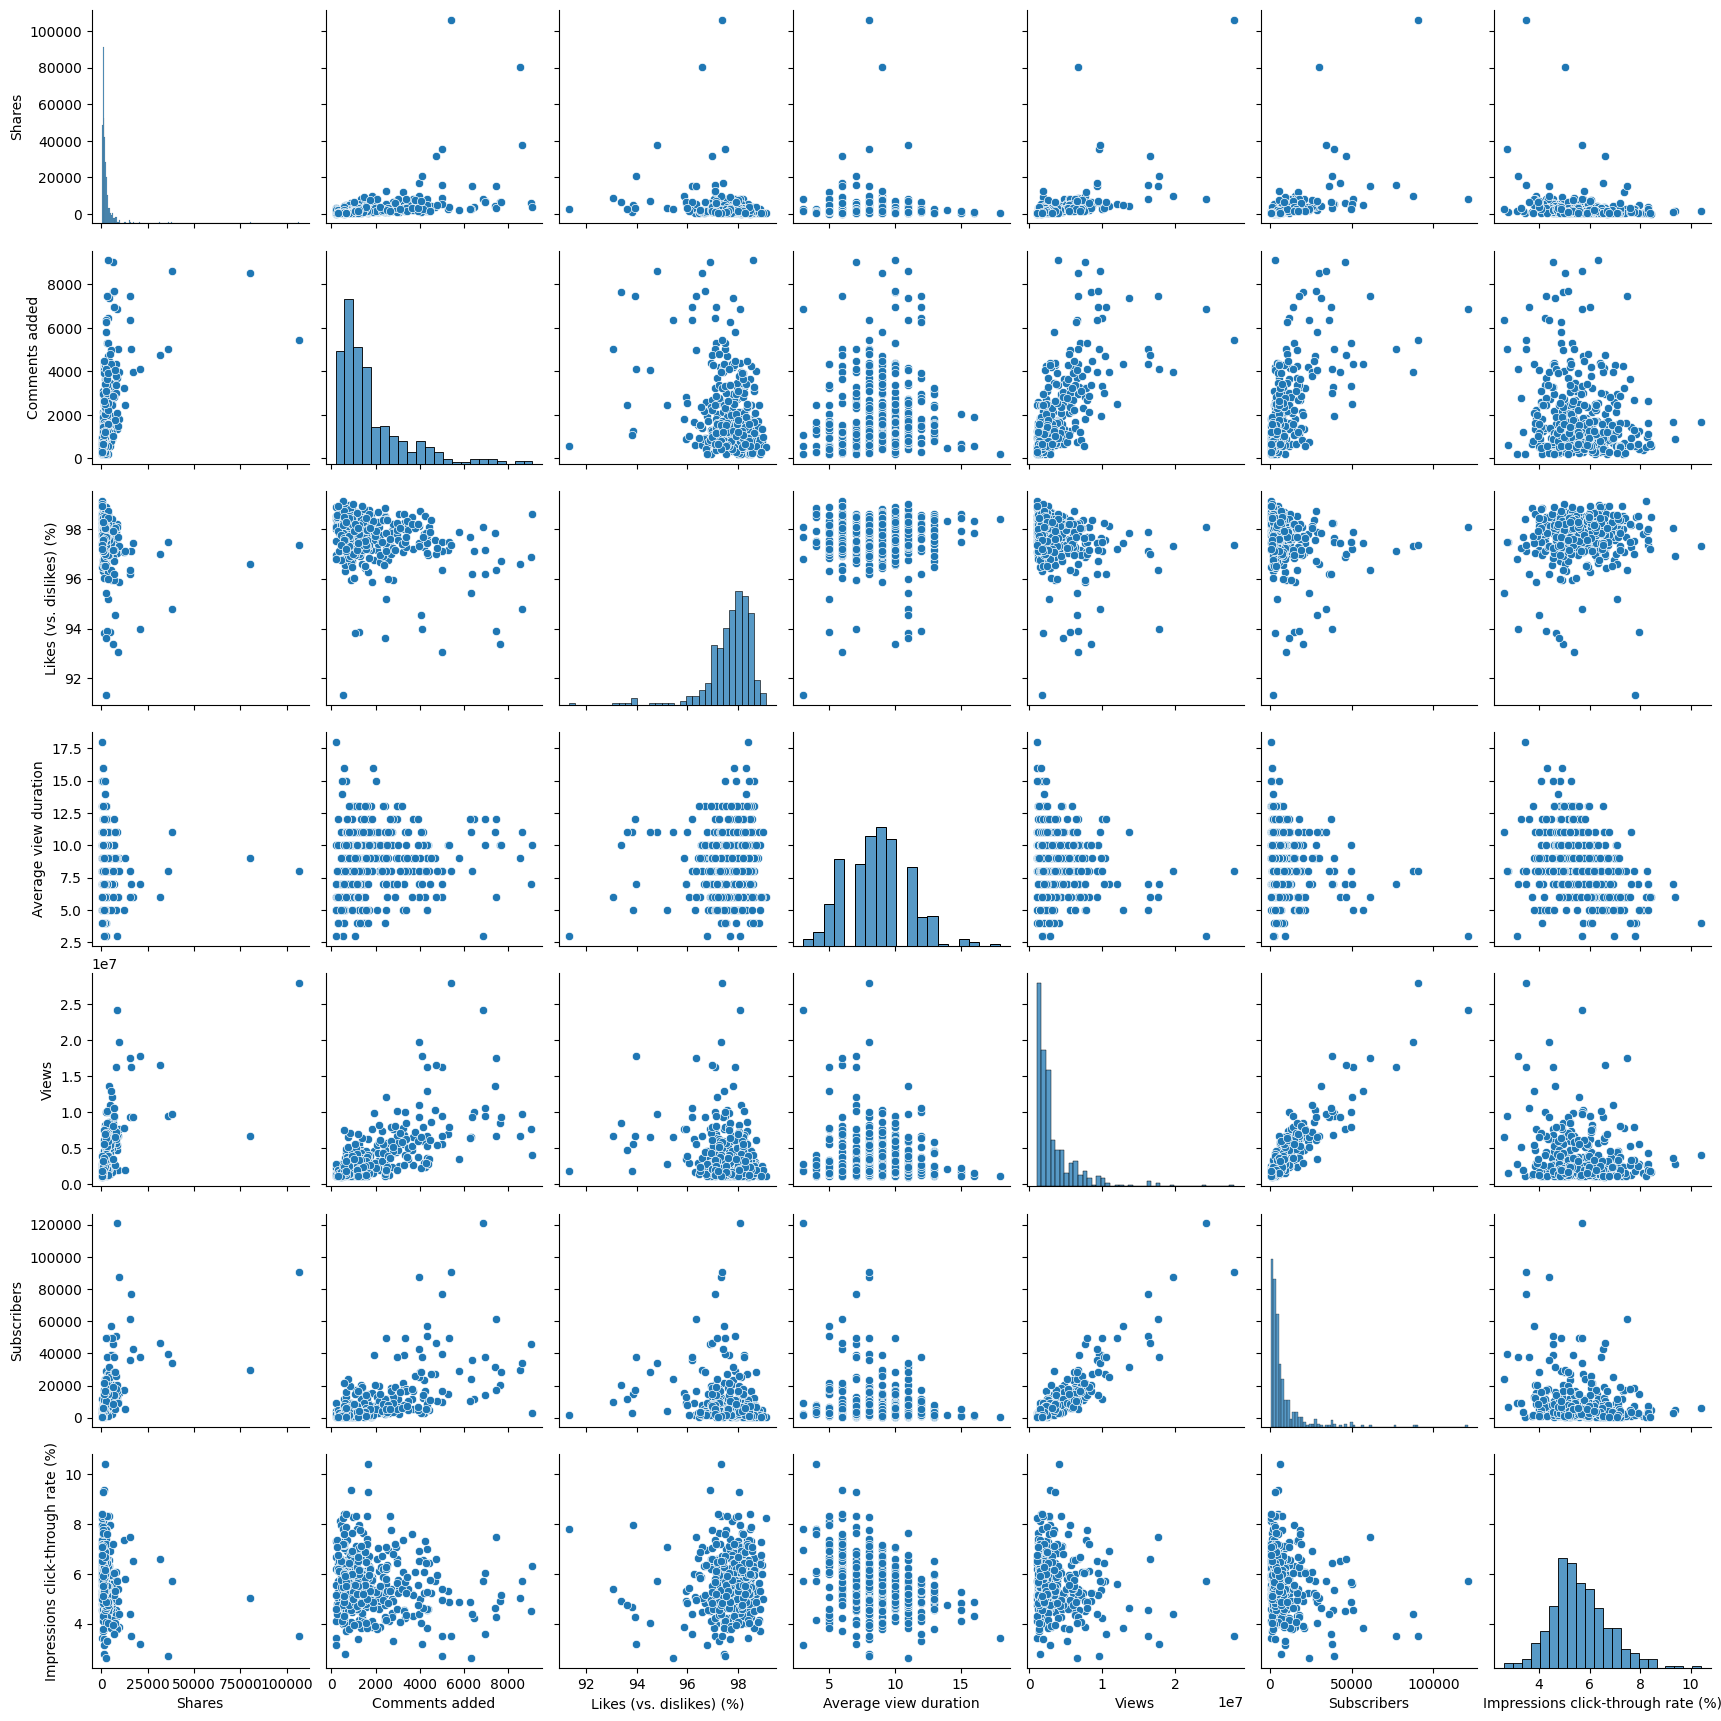

In [37]:
sns.pairplot(df)

Standardize and scale the data 

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Model Selection

After randomly selecting 5 different regressor algorithms, we'll train them on the data and compare the results to pick the one with the best results of the bunch.

In [102]:
results=[]

models=[
    ('Linear Regression',LinearRegression()),
    ('Decision Tree',DecisionTreeRegressor(random_state=1)),
    ('Random Forest',RandomForestRegressor(random_state=1)),
    ('Gradient Boost',GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=1)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=100,random_state=1)),
    ('KNN',KNeighborsRegressor(n_neighbors=100))
]

In [40]:
for name, model in models :
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=model.score(X_test,y_test)
  MSE=mean_squared_error(y_test,y_pred)
  R2_score=r2_score(y_test,y_pred)
  results.append((name,accuracy,MSE,R2_score))

  acc_train=(model.score(X_train,y_train)*100)
  print(f'Accuracy of {name} model train is {acc_train:.2f}')

  acc_test=(model.score(X_test,y_test)*100)
  print(f'Accuracy of  {name} model train is {acc_test:.2f}')

Accuracy of Linear Regression model train is 84.69
Accuracy of  Linear Regression model train is 84.73
Accuracy of Decision Tree model train is 100.00
Accuracy of  Decision Tree model train is 60.75
Accuracy of Random Forest model train is 97.31
Accuracy of  Random Forest model train is 77.92
Accuracy of Gradient Boost model train is 96.84
Accuracy of  Gradient Boost model train is 79.78
Accuracy of Bagging Regressor model train is 97.38
Accuracy of  Bagging Regressor model train is 78.38
Accuracy of KNN model train is 43.31
Accuracy of  KNN model train is 27.46


In [41]:
results_df=pd.DataFrame(results,columns=['Model','Accuracy','MSE','R2_score'])
results_format_df=results_df.style.highlight_max(subset=['Accuracy','R2_score'],color='green').highlight_min(subset=['Accuracy','R2_score'],color='red')
display(results_format_df)

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.847278,2957327967631.730957,0.847278
1,Decision Tree,0.607508,7600252643933.046875,0.607508
2,Random Forest,0.779199,4275608488098.195312,0.779199
3,Gradient Boost,0.797830,3914839494953.789062,0.797830
4,Bagging Regressor,0.783781,4186890620424.841797,0.783781
5,KNN,0.274603,14046652599939.826172,0.274603


The results show that Linear Regression has the highest accuracy. We will then perform a k-fold cross validation on the LR model and then predict the target variables

In [42]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 5))}]


# step-3: perform grid search
# 3.1 specify model
LR = LinearRegression(n_jobs=100)
LR.fit(X_train,y_train)
rfe = RFE(LR)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression(n_jobs=100)),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4]}],
             return_train_score=True, scoring='r2', verbose=1)

In [43]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008235,0.000743,0.001198,0.000055,1,{'n_features_to_select': 1},0.872973,0.713915,0.638191,0.821452,...,0.778151,0.088258,4,0.777633,0.827158,0.820650,0.798365,0.787099,0.802181,0.019024
1,0.006627,0.000506,0.001160,0.000057,2,{'n_features_to_select': 2},0.895313,0.765359,0.732212,0.791844,...,0.814376,0.065587,3,0.814923,0.855493,0.846681,0.843679,0.818664,0.835888,0.016110
2,0.004962,0.000080,0.001101,0.000019,3,{'n_features_to_select': 3},0.907476,0.769631,0.732431,0.790425,...,0.818628,0.069394,1,0.818508,0.861846,0.853374,0.851193,0.825053,0.841994,0.017011
3,0.003972,0.000117,0.001141,0.000052,4,{'n_features_to_select': 4},0.909148,0.762281,0.729862,0.797753,...,0.817994,0.070582,2,0.821919,0.867203,0.855566,0.853081,0.827861,0.845126,0.017299


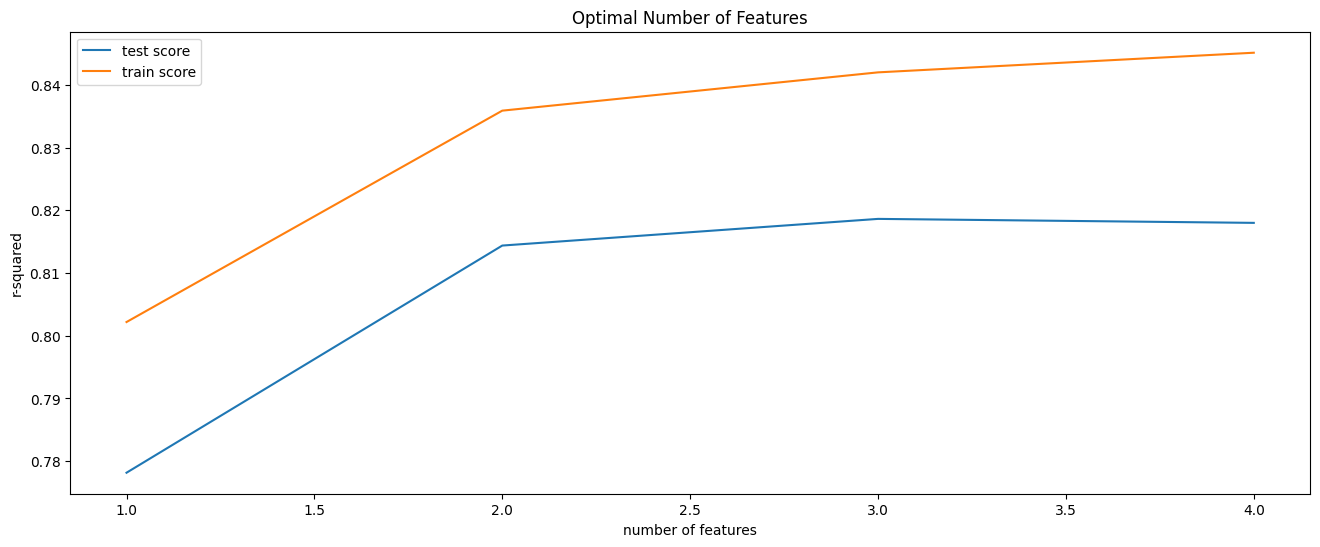

In [44]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [45]:
# final model
n_features_optimal = 3

LR = LinearRegression()
LR.fit(X_train, y_train)

rfe = RFE(LR, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_predLR = LR.predict(X_test)
r2 = r2_score(y_test, y_predLR)
print(r2)

0.8472776300223817


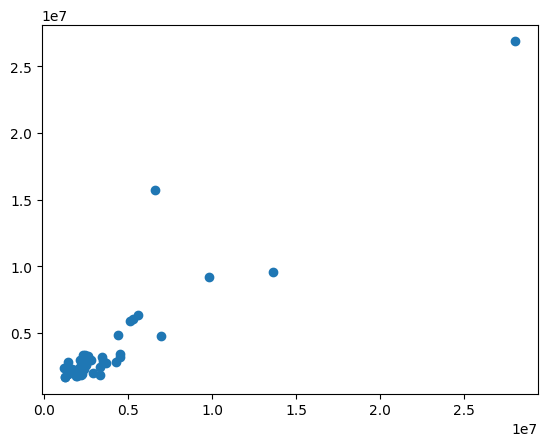

In [46]:
plt.scatter(y_test,y_predLR)

In [47]:
print('MAE:', mean_absolute_error(y_test, y_predLR))
print('MSE:', mean_squared_error(y_test, y_predLR))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predLR)))

MAE: 957403.9343012606
MSE: 2957327967631.731
RMSE: 1719688.3344466027


Feature: 0, Score: 295011.67197
Feature: 1, Score: 579502.57082
Feature: 2, Score: -143049.72770
Feature: 3, Score: 65511.43439
Feature: 4, Score: 2215538.34556
Feature: 5, Score: 193414.90677


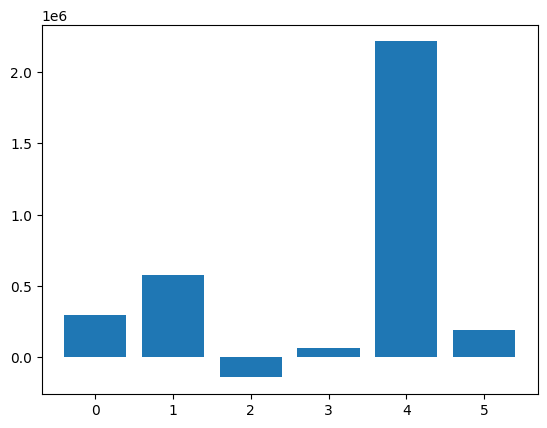

In [59]:
# get importance
LR_importance = LR.coef_
# summarize feature importance
for i,v in enumerate(LR_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(LR_importance))], LR_importance)
plt.show()

The feature with the most importance is the number of subscribers. This has the most impact on the number of views of a video. Shares and comments also play some role in the number of views. The likes has a slighlty negative impact on the number of views

#### Out of sample prediction

The next step is to use the LR model to make predictions on the test data that wasn't used to train the model. 

In [61]:
test_df = test_df.drop('Views prediction', axis=1)

In [63]:
test_df_scaled = scaler.transform(test_df)

In [65]:
y_pred_final_LR = LR.predict(test_df_scaled)

To compare how the predictions fared, we will use the Kernel Density Estimate plot to compare the predictions with the target value used to train the data 

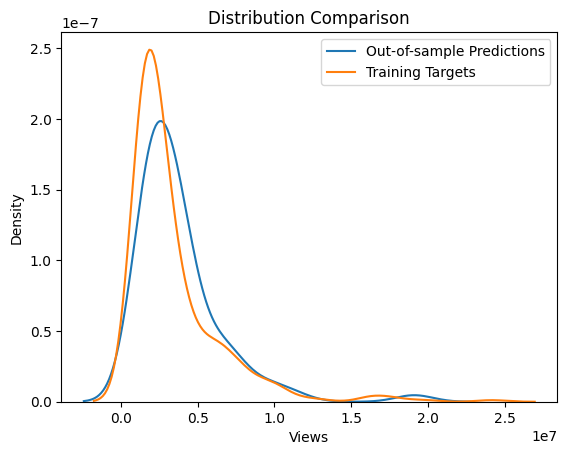

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(y_pred_final_LR, label="Out-of-sample Predictions")
sns.kdeplot(y_train, label="Training Targets")
plt.legend()
plt.title("Distribution Comparison")
plt.show()


The similarity in the shape of the two plots mean that they are similar in distribution, this is a positive sign. To further reiterate this, we'll calculate the overlap percentage between the two plots. 

In [81]:
import numpy as np
from scipy.stats import gaussian_kde
from scipy.integrate import simps

# Assume 'predicted_values' and 'target_values' are the scaled arrays
predicted_values = y_pred_final_LR
target_values = y_train

# Compute KDEs
kde_predicted = gaussian_kde(predicted_values)
kde_target = gaussian_kde(target_values)

# Define a range of x-values
x_vals = np.linspace(min(np.min(predicted_values), np.min(target_values)), 
                     max(np.max(predicted_values), np.max(target_values)), 1000)

# Evaluate KDEs at x-values
density_predicted = kde_predicted(x_vals)
density_target = kde_target(x_vals)

# Calculate overlapping area
overlap_area = simps(np.minimum(density_predicted, density_target), x_vals)

# Calculate total area under both KDEs
total_area_predicted = simps(density_predicted, x_vals)
total_area_target = simps(density_target, x_vals)

# Compute overlap percentage
overlap_percentage = (2 * overlap_area) / (total_area_predicted + total_area_target) * 100

print("Overlap percentage: {:.2f}%".format(overlap_percentage))

Overlap percentage: 85.93%


/var/folders/4l/b5w_zfm54ds8qh4ftdrtn4900000gn/T/ipykernel_9402/946584787.py:22: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  overlap_area = simps(np.minimum(density_predicted, density_target), x_vals)
/var/folders/4l/b5w_zfm54ds8qh4ftdrtn4900000gn/T/ipykernel_9402/946584787.py:25: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  total_area_predicted = simps(density_predicted, x_vals)
/var/folders/4l/b5w_zfm54ds8qh4ftdrtn4900000gn/T/ipykernel_9402/946584787.py:26: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  total_area_target = simps(density_target, x_vals)


The percentahe is 85.93 which falls in the veri high overlap range usually betweem (80-100%). This then indicates excellent predictive performance and a high degree of similarity between the predicted and target distributions.

In [114]:
# Add predicted values to the DataFrame
test_df['Views prediction'] = y_pred_final_LR

# Save the updated DataFrame to a CSV file
test_df.to_csv('X_test.csv', index=False)

In [112]:
test_df.head()

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Subscribers,Impressions click-through rate (%),Views prediction
0,27558,3243,95.66,11.0,28895,4.84,9.755512e+06
1,575,942,98.10,10.0,879,5.99,1.698829e+06
2,5362,1903,95.28,6.0,10362,5.98,4.413777e+06
3,1231,465,93.65,10.0,3119,5.35,2.544079e+06
4,4115,2126,97.16,13.0,10311,3.55,3.870565e+06
